In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
data = pd.DataFrame(data = iris.data, columns= iris.feature_names )

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = pd.factorize(iris.target)[0]
X = iris.data   

In [10]:
X = np.hstack((np.ones((len(X), 1)), X))

In [11]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [20]:
m,n = X.shape
k = 3
m,n,k

(150, 5, 3)

In [21]:
np.random.seed(0)
theta = np.random.random((n,k))


In [22]:
theta

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606]])

In [23]:
def softmax(z):
    z -= np.max(z)   
    """ To get rid of very large value of dnominatir in activation function  
    """

    return np.exp(z)/np.sum(np.exp(z))

In [24]:
def h(X, theta):
    return softmax(X @ theta)

In [25]:
def J(preds, y):
    return np.sum(-np.log(preds[np.arange(m),y]))

In [26]:
def T(y, k):
    """One hot encoding"""
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot 

In [27]:
def compute_gradient(theta, X, y):
    preds = h(X, theta)
    gradient = 1/m * X.T @(preds - T(y, k))
    return gradient

In [30]:
hist ={'loss': [],'acc': []}
alpha = 1e-3

for i in range(1500):
    gradient = compute_gradient(theta, X, y)
    theta -= alpha * gradient

    #Loss
    preds = h(X, theta)
    loss = J(preds , y)
    hist['loss'].append(loss)

    #acc
    c = 0
    for j in range(len(y)):
        if np.argmax(h(X[j] , theta)) == y[j]:
            c += 1
    acc = c/len(y)
    hist['acc'].append(acc)

    #print stats
    if i % 200 ==0:
        print('{:2f}''{:.2f}%'.format(loss, acc*100))    

1145.40305020.67%
1119.37946834.00%
1097.88418249.33%
1080.74369158.67%
1067.77267260.67%
1058.75731563.33%
1053.44371964.67%
1051.53615268.67%


Text(0.5, 0, 'accuracy')

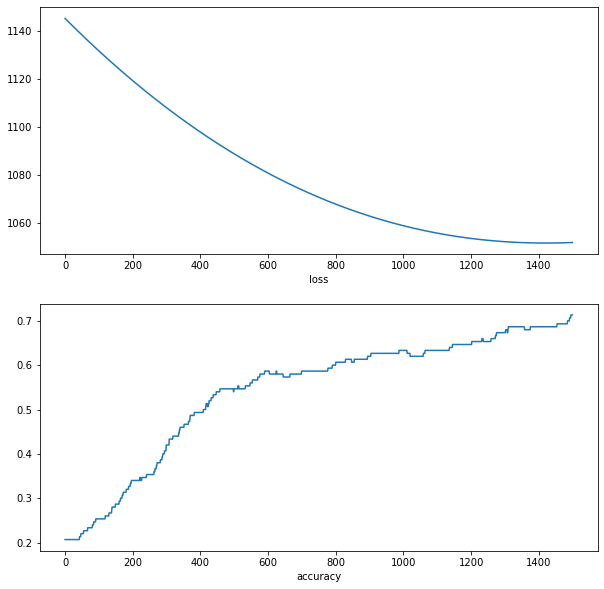

In [31]:
figsize(10,10)
subplot(2,1,1)
plot(hist['loss'])
xlabel('loss')
subplot(2,1,2)
plot(hist['acc'])
xlabel('accuracy')


Reference https://github.com/rickwierenga/MLFundamentals/blob/master/3_Softmax_Regression.ipynb

https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html

For derivation of gradient descnt over softmax activation function
https://www.youtube.com/watch?v=ACEOKYS5MUk 


https://www.youtube.com/watch?v=5-rVLSc2XdE

Why softmax is called softmax
https://math.stackexchange.com/questions/1888141/why-is-the-softmax-function-called-that-way

https://www.quora.com/Why-is-softmax-activate-function-called-softmax


Here are inbuilt libraries in documentation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/


# Gradient Descent

Iteration: 500/500 | Cost 0.06 | Elapsed: 0:00:00 | ETA: 0:00:00

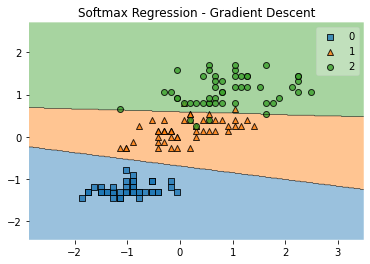

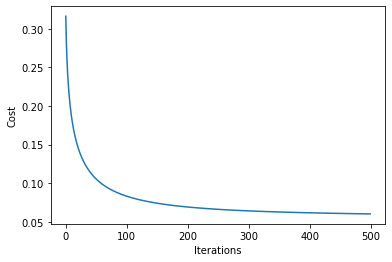

In [18]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import SoftmaxRegression
import matplotlib.pyplot as plt

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


lr = SoftmaxRegression(eta=0.01, 
                       epochs=500, 
                       minibatches=1, 
                       random_seed=1,
                       print_progress=3)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [19]:
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


In [20]:
y_pred = lr.predict_proba(X)
print('Last 3 Class Labels:\n %s' % y_pred[-3:])


Last 3 Class Labels:
 [[9.18728149e-09 1.68894679e-02 9.83110523e-01]
 [2.97052325e-11 7.26356627e-04 9.99273643e-01]
 [1.57464093e-06 1.57779528e-01 8.42218897e-01]]


# Stochastic Gradient Descent

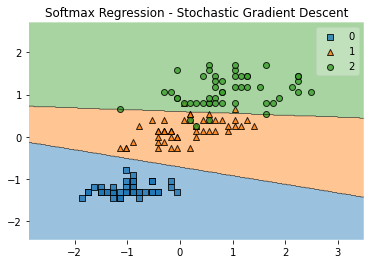

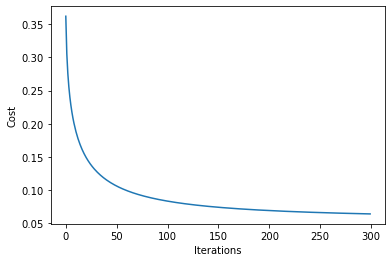

In [24]:
lr = SoftmaxRegression(eta=0.01, epochs=300, minibatches=len(y), random_seed=1)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Reference of above
http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/